# Polarne krivuljice

Biranje krivulja za eksperiment za polarne krivulje

In [68]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import math

In [70]:
x = sp.Symbol("x")
y = sp.Symbol("y")

x_arr = np.linspace(0, 2 * math.pi, 10000)

def calculate_riemann_integral(f, x0, x1, numpoints = 1000):
    integral_approx = 0
    # distance between two points (will be very small)
    delta = (x1 - x0) / numpoints
    i = 0
    while x0 < x1:
        # put integral_approx calculation inside try-except
        # in case we get "division by zero" exception.
        if(i % (numpoints / 10) == 0):
            # this condition is meant to represent a "loading bar"
            # it will print the current percentage of points processed
            # print(round(x0 / x1, 3) * 100, "%  done")
            pass
        try:
            # Riemann sum
            print("adding ", f(x0), ' * ', delta)
            integral_approx += abs(f(x0) * delta)
        except Exception as e:
            # this might, on very rare occassions, be
            # "division by zero"
            print(e)
        finally:
            x0 += delta
            i += 1
    return integral_approx


def get_kappa(f):
    fder = f.diff(x)
    fderder = fder.diff(x)

    # kappa for polar coordinates
    kappa = abs(f**2 + 2 * fder**2 - f * fderder) / ((fder**2 + f**2) ** (3 / 2)) + 1
    
    y = calculate_y(kappa)
    return kappa

    
def get_idx_of_difficulty(function):
    kappa = get_kappa(function)
    # because of the complex calculation revolving the curvature
    # (kappa), we instead calculate its approximation
    # by summing up y values for each x0 in such a way that
    # the distance between two x0 points is infinitely small

    # if coordinates are polar, then we sum up phi values from 0 to 2pi
    x0 = 0
    x1 = 2 * math.pi
    kappa = sp.lambdify(x, kappa, "numpy")

    integral_approx = calculate_riemann_integral(kappa, x0, x1, 1000)
    return integral_approx


def calculate_y(function):
    y = np.zeros(len(x_arr))
    # get the function for plotting
    f = sp.lambdify(x, function, "numpy")

    for i in range(0, len(x_arr)):
        # calculate y for each given y
        y[i] = f(x_arr[i])

    return y


def plot_function(f):
    y = calculate_y(f)
    
    idx_of_difficulty = get_idx_of_difficulty(f)
    print("Index of difficulty:", idx_of_difficulty)
    
    fig = plt.figure()
    graph = fig.add_subplot(111, projection="polar")
    graph.set_ylim([0, 2.5])
    graph.set_yticks([])

    graph.plot(x_arr, y) 

    plt.show()


def make_sin_rosette(a, b, c):
    return a + b * sp.sin(c * x)


def make_spiral(a, b):
    return a + b * x


def make_bean(a, b, c, d):
    return a + b * sp.sin(c * x) * sp.cos(d * x)

def make_sine_gaussian(a, b, c, d, f):
    return a * sp.exp(-(x + b)**2/c) * sp.sin(d * (x + f))

def make_sinc(a, b, c):
    return a*sp.sin(b*(x-c)) / (b*(x-c))

def make_fourier(a, b, c):
    return sp.sin(x /a) + sp.sin(x / b) + sp.cos(x / c) - 1   

# Difficulty: Easy

## Test 1

In [ ]:
plot_function(make_sin_rosette(1.8, 0.3, 2))
plot_function(make_spiral(1.6, 0.1))

## Test 2

In [ ]:
plot_function(make_spiral(1.8, 0))
plot_function(make_sin_rosette(1.75, -0.1, 3))

# Difficulty: Medium

## Test 1

In [ ]:
plot_function(make_sin_rosette(1.2, -0.75, 2))
plot_function(make_bean(1.4, -0.7, 1.5, 3.3))

## Test 2

In [ ]:
plot_function(make_bean(1.3, 0.7, 3, 1))
plot_function(make_sin_rosette(1.2, -0.75, 2.3))

# Difficulty: Hard

## Test 1

In [ ]:
plot_function(make_sin_rosette(1.3, -0.6, 6.1))
plot_function(make_bean(1.4, -0.7, 5.1, 3))

## Test 2

In [ ]:
plot_function(make_sin_rosette(1.3, -0.7, 5.1))
plot_function(make_bean(1.4, -0.75, 3.1, -5))

In [ ]:
x1 = math.pi / 2 #phi
y1 = 1

x2 = math.pi
y2 = 1

x1 = -0.007215007215007012
y1 = 1.8001443001443 
x2 = 1.1022704775875347e-16
y2 = 1.8001443001443

phi1 = x1
r1 = y1
phi2 = x2
r2 = y2

tmp_x1, tmp_y1 = (y1 * np.cos(x1), y1 * np.sin(x1))
tmp_x2, tmp_y2 = (y2 * np.cos(x2), y2 * np.sin(x2))

f = (tmp_y2 - tmp_y1) / (tmp_x2 - tmp_x1) * (x - tmp_x1) + tmp_y1
print("Funkcija linije:", f)
f = sp.lambdify(x, f)
tmp = calculate_riemann_integral(f, tmp_x1, tmp_x2, 10)
print("integral:", tmp)

r = f(0) / (sp.sin(x) - (f(1) - f(0)) * sp.cos(x))
print("Funkcija linije u polarnom sustavu:", r)
plt.figure()
plt.polar([phi1, phi2], [r1, r2])
plt.show()

plt.figure()
plt.polar(x_arr, calculate_y(r))
plt.ylim([0, 1])
plt.show()

r = 0.5 * r**2
r = sp.lambdify(x, r, "numpy")

# calculate integral of surface
tmp = calculate_riemann_integral(r, x1, x2, 1000)
print("integral:", tmp)

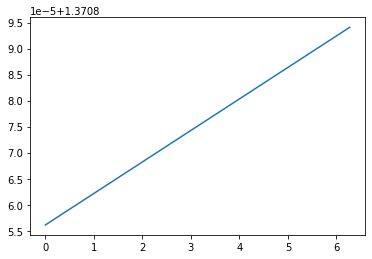

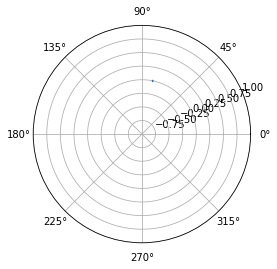

6.5070411390776034e-06
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.22044604

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.5070411390776e-06  *  2.2204460492503132e-17
adding  6.

In [ ]:
def is_cartesian(projection):
    return False

projection = 1
x1 = 1.5748043213653204
y1 =  1.8001587590185273 
x2 = 1.5707963267948966
y2 = 1.8001443001443

x1 = 1.5707963267948966 
y1 = 1.8073593073593068
x2 = 1.5668043320324738
y2 = 1.8073737085139383

x1 = 5.75826480059187
y1 = 1.317331697553854     
x2 = 5.757785159923143
y2 = 1.3593971609690396

x1 = 6.275290734349426
y1 = 1.3708940906231912
x2 = 0.002631572872649812
y2 = 1.3708561175584262

plt.figure()
plt.plot([x1, x2], [y1, y2])
plt.show()

if(is_cartesian(projection) is False):
    x1, y1 = (y1 * np.cos(x1), y1 * np.sin(x1))
    x2, y2 = (y2 * np.cos(x2), y2 * np.sin(x2))

plt.figure()
plt.polar([x1, x2], [y1, y2])
plt.ylim([-1, 1])
plt.show()

while(x1 < 0):
    x1 += 2 * math.pi

while(x2 < 0):
    x2 += 2 * math.pi
    
    
if(abs(x2 - x1) < 0.001):
    pass

k = 0
try:
    k = (y2 - y1) / (x2 - x1)
except:
    pass

f = k * (x - x1) + y1
# get the equation of the line on which point1 and point2 lay
if(is_cartesian(projection) is False):
    f = sp.lambdify(x, f, "numpy")
    f = f(0) / (sp.sin(x) - (f(1) - f(0)) * sp.cos(x))
    f = (y1 + y2) / 2
    f = 0.5 * f**2
    # print("Polar function: ", f)
print(f)
f = sp.lambdify(x, f, "numpy")

# calculate integral of surface
tmp = calculate_riemann_integral(f, x1, x2, 10)
print(": Integral: ", tmp, ' :: ', x1, y1, ', ', x2, y2)